In [1]:
import pandas as pd

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
#from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV

In [2]:
target='target'
IDcol='ID'
train=pd.read_csv('train_modified2.csv')

In [4]:
train.head()

,ID,target,v1,v10,v100,v101,v102,v103,v104,v105,...,v72_3,v72_4,v72_5,v72_6,v72_7,v72_8,v72_9,v72_10,v72_11,v72_12
0,3,1.0,1.335739,0.503281,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,5.585847,1.312910,5.585847,5.585847,5.585847,5.585847,5.585847,1.505335,...,0,0,0,0,0,0,0,0,0,0
2,5,1.0,0.943877,0.765864,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,...,1,0,0,0,0,0,0,0,0,0
3,6,1.0,0.797415,6.542669,18.256352,8.507281,2.503055,4.872157,2.573664,0.113967,...,0,0,0,0,0,0,0,0,0,0
4,8,1.0,6.384421,1.050328,6.384421,6.384421,6.384421,6.384421,6.384421,6.384421,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test=pd.read_csv('test_modified2.csv')

In [6]:
predictors=[x for x in train.columns if x not in [target,IDcol]]

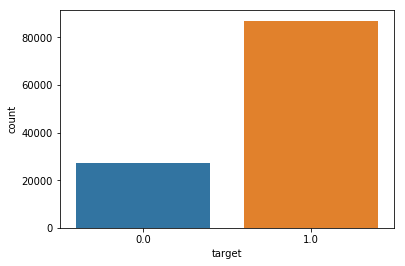

In [9]:
import seaborn as sns
sns.countplot(train['target'])

In [10]:
model=xgb.XGBClassifier()
model.fit(train[predictors],train[target],eval_metric='auc')
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [11]:
y_pred = model.predict(train[predictors])
y_predprob = model.predict_proba(train[predictors])[:,1]


In [12]:
print ("Accuracy : %.4g" % metrics.accuracy_score(train['target'].values, y_pred))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(train['target'], y_predprob))


Accuracy : 0.7874
AUC Score (Train): 0.764417


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#fscore = model.get_booster().get_score(importance_type='weight')
fscore = pd.Series(model.get_booster().get_score(importance_type='weight'))
fscore.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

(array([  5071.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 109322.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

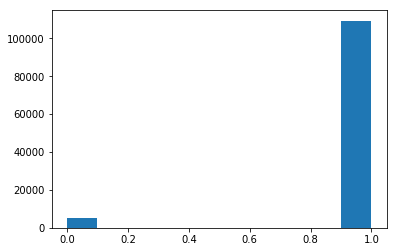

In [14]:
import matplotlib.pyplot as plt
plt.hist(model.predict(test[predictors]))

In [17]:
y_xg = model.predict(test[predictors])
predictions = [value for value in y_xg]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, modelXg.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, modelXg.predict_proba(X_train)[:,1]))

NameError: name 'y_test' is not defined